[View in Colaboratory](https://colab.research.google.com/github/raahatg21/IMDB-Dataset-Sentiment-Analysis-with-Keras/blob/master/IMDB_RNN_1.ipynb)

# IMDB Dataset: Sentiment Analysis

**Using LSTM Layers, and Word Embeddings. 89.56% Validation Accuracy. 87.9% Testing Accuracy.**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_features = 10000  # Only include top 10,000 words in the vocabulary
maxlen = 500  # Cut off each review after 500 words
batch_size = 32

In [0]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = max_features)

In [8]:
X_train.shape, X_test.shape

((25000,), (25000,))

In [10]:
y_train[1], y_train[2], y_test[4]

(0, 0, 1)

In [0]:
# Padding the data so that each sequence is of exactly 500 words

X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

In [12]:
X_train.shape, X_test.shape

((25000, 500), (25000, 500))

In [0]:
# Building the Model

model = models.Sequential()
model.add(layers.Embedding(max_features, 32, input_length = maxlen))
model.add(layers.Dropout(0.2))
model.add(layers.CuDNNLSTM(32))  # return_sequences = False
model.add(layers.Dense(1, activation = 'sigmoid'))

Since CuDNN doesn't support dropout and recurrent_dropout, we couldn't write the following:

```
model.add(layers.CuDNNLSTM(32, dropout = 0.1, recurrent_dropout = 0.5))
```
Hence, our model will be inferior in case of small datasets: 
https://github.com/keras-team/keras/issues/8935


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 32)                8448      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,481
Trainable params: 328,481
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the Model

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])

In [17]:
# Training

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = 15, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 45s 2ms/step - loss: 0.4663 - acc: 0.7794 - val_loss: 0.3540 - val_acc: 0.8506
Epoch 2/15
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2933 - acc: 0.8856 - val_loss: 0.2991 - val_acc: 0.8822
Epoch 3/15
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2455 - acc: 0.9077 - val_loss: 0.2952 - val_acc: 0.8896
Epoch 4/15
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2159 - acc: 0.9199 - val_loss: 0.2761 - val_acc: 0.8846
Epoch 5/15
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1969 - acc: 0.9284 - val_loss: 0.2761 - val_acc: 0.8850
Epoch 6/15
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1844 - acc: 0.9315 - val_loss: 0.2917 - val_acc: 0.8746
Epoch 7/15
20000/20000 [==============================] - 44s 2ms/step - loss: 0.1718 - acc: 0.9378 - val_loss: 0.5046 - val_acc:

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

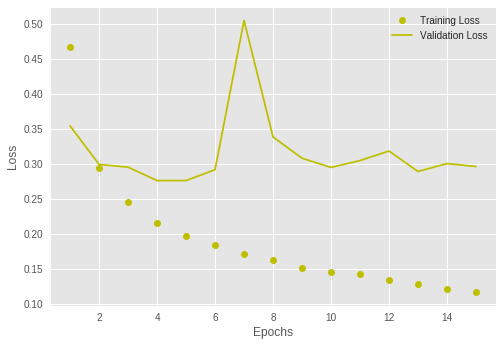

In [19]:
# Plotting Training and Validation Loss

epochs = range(1, 16)

plt.plot(epochs, loss, 'yo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'y', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

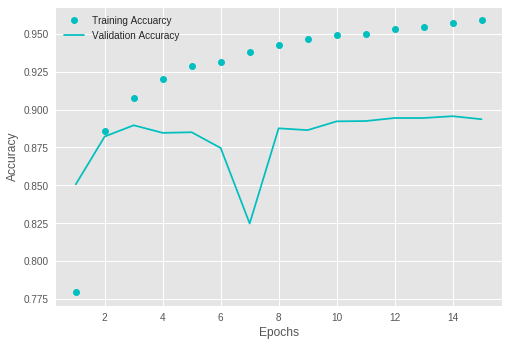

In [20]:
# Plotting Training and Validation Accuracy

plt.plot(epochs, acc, 'co', label = 'Training Accuarcy')
plt.plot(epochs, val_acc, 'c', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# Testing

model.evaluate(X_test, y_test)

25000/25000 [==============================] - 24s 965us/step


[0.33416910270094874, 0.87944]